# Unbalanced data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
class_count_0, class_count_1 = df.Class.value_counts()

<AxesSubplot:xlabel='Class', ylabel='count'>

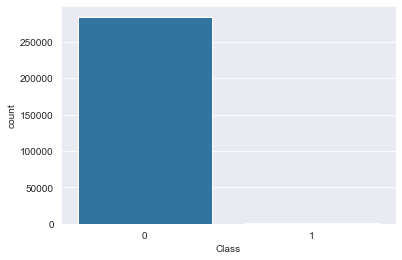

In [5]:
sns.countplot(data=df, x='Class')

**class is highly imbalanced**

## Handle imbalance data

**resampling technique can be applied on dataset to balance the data. either remove some data from majority class (undersampling) or add some data to minority class (oversampling)**

### Oversampling

#### Random oversampling ( By replicating data of minority class )

In [6]:
class_count_0

284315

In [7]:
class_count_1

492

In [8]:
class_0 = df[df.Class == 0]
class_1 = df[df.Class == 1]
class_0.shape, class_1.shape

((284315, 31), (492, 31))

In [9]:
# oversampling minority class by replicating data

class_1_over = class_1.sample(class_count_0, replace=True)
random_oversampling = pd.concat([class_0, class_1_over], axis=0)

In [10]:
random_oversampling.shape

(568630, 31)

In [11]:
random_oversampling.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

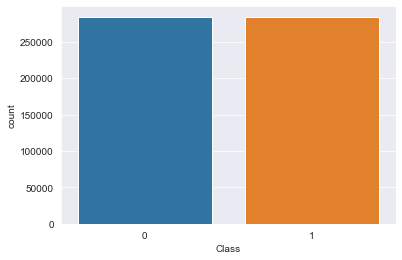

In [12]:
sns.countplot(x=random_oversampling.Class)

#### random oversampling with imblearn

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [15]:
x.shape

(284807, 30)

In [16]:
y.shape

(284807,)

In [17]:
x_res , y_res = RandomOverSampler(random_state=42).fit_resample(x, y)

In [18]:
print('initial dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

initial dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


#### Synthetic Minority Oversampling Technique (SMOTE)

*This technique generates synthetic data for the minority class. SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors*

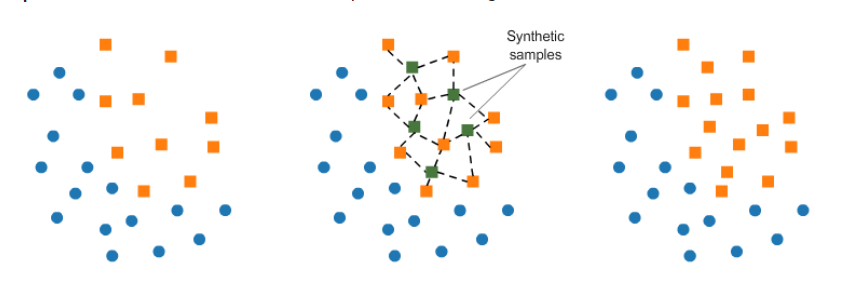

**SMOTE algorithm works in 4 simple steps:**

- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE() 

# fit and resample
x_smote , y_smote = smote.fit_resample(x, y)

In [20]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


### Undersampling

*Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.*

#### Random Under-Sampling

In [21]:
class_0_under = class_0.sample(class_count_1)

random_undersampling = pd.concat([class_0_under, class_1], axis=0)

In [22]:
random_undersampling.shape

(984, 31)

<AxesSubplot:xlabel='Class', ylabel='count'>

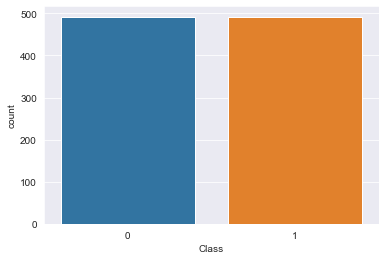

In [23]:
sns.countplot(x=random_undersampling.Class)

#### Random under-sampling with imblearn

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
x_rus , y_rus = RandomUnderSampler(random_state=42).fit_resample(x, y)

In [26]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


#### Under-sampling: Tomek links

*Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.*

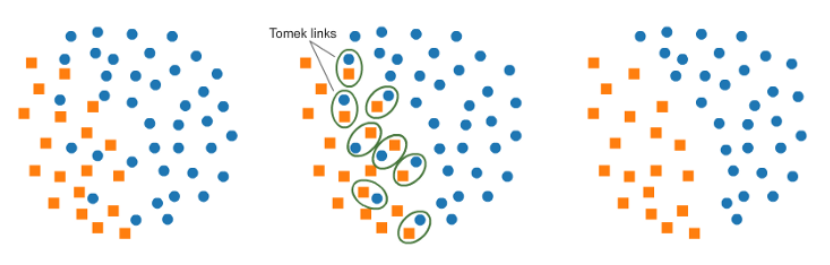

In [27]:
from imblearn.under_sampling import TomekLinks

x_tl , y_tl = RandomUnderSampler(sampling_strategy='majority').fit_resample(x, y)

In [28]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


#### NearMiss

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

*NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.*

In [29]:
from imblearn.under_sampling import NearMiss

x_nm, y_nm = NearMiss().fit_resample(x, y)

In [30]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_nm))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


## Penalize Algorithms (Cost-Sensitive Training)

*The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.*

https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

## Change the algorithm

*Try out different algorithms to find out which best fit on dataset. Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.)*